# Santander Customer Transaction Prediction

We need to identify which customer will make a specific transaction in the near future, irrespective of the money transacted.
This problem is a binary classification problem under supervised learning using AUC and ROC curves for model evaluation. 
This data consists of 200 numerical anonymous predictor features, These features have already undergone PCA. The dataset contains no missing values. The exploratory analysis include visualization of the descriptive features related to numerical features and some feautre engineering.

## Index
* [Importing Required Libraries](#Importing-Required-Libraries)
* [Dataset Description ](#Dataset-Description)
* [Missing Values](#Missing-values)
* [Undersampling](#Undersampling)
* [Splitting Data](#Splitting-Data)
* [Feature Importance](#Feature-Importance)
* [Normalization](#Normalization)
* [Support Vector Classifier](#Support-Vector-Classifier)
* [Random Forest Classifier](#Random-Forest-Classifier)
* [ROC Curve](#ROC-Curve)

## Importing Required Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

# Dataset Description

In [20]:
train = pd.read_csv("train.csv")  #calling the dataset
train.head() #First Five rows

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [21]:
test = pd.read_csv("test.csv")
test =test.drop(["ID_code"],axis =1)
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [22]:
train.iloc[:,2:].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


There is very high difference between the range of values. i.e between the min and max values of most of the datasets.
Lets check if this dataset has any missing data.

## Missing Values

In [62]:
def missing_data(data):
    null = data.isnull().sum()
    percent = (null/data.isnull().count()*100)
    null_table = pd.concat([null,percent],axis = 1, keys = ["Total","percent"])
    return np.transpose(null_table)

In [63]:
missing_data(train.iloc[:,2:])

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Undersampling

20098


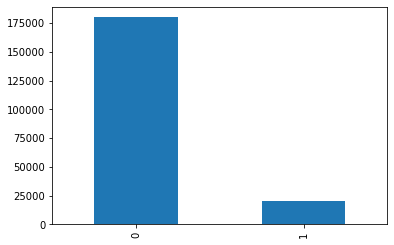

In [25]:
train["target"].value_counts().plot(kind = "bar")
print(train["target"].value_counts()[1])# creating a bar chart to view the data
plt.show()

The data from above seems to be heavily unbalanced. Hence we can't use all the data containing 0 as this will over fit my prediction model. In order to prevent the bias we need to use random data of 2000 0's and 1's
I'll be using  imblearn Library to undersample the data

Undersampling the dataset will work here as we have enough amount of minorty class for our prediction.

In [26]:
cols = ["ID_code","target"]
X = train.drop(cols,axis =1)
y = train["target"]

In [27]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [28]:
X_under

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,9.7690,1.4667,7.8468,9.8257,13.1672,-16.8422,5.0942,17.9466,4.0465,7.8894,...,1.1214,9.1862,1.8613,0.4957,14.6981,0.6679,0.7120,8.8651,15.4004,6.6679
1,13.5851,-6.3567,10.5400,7.9878,13.0058,-8.4877,5.2859,12.8072,-1.9943,7.6462,...,-2.9140,5.0069,0.0629,2.3308,21.1480,-1.5149,4.5006,8.2537,16.9748,-18.0998
2,6.2522,-5.9345,13.6663,5.4798,13.3047,-8.0524,6.4125,17.9391,0.4427,8.3678,...,9.3466,10.5857,1.6878,6.8869,15.3538,-1.2131,-4.2540,8.0443,9.7044,-6.6877
3,7.1384,2.6376,7.8597,6.0171,10.3199,-8.1340,5.6316,16.2723,-1.3628,9.0800,...,-1.9770,6.3760,2.2928,-4.9563,20.1302,-2.3482,5.9421,10.2819,8.9119,-0.2638
4,12.9646,2.3969,12.1089,7.2980,10.5514,-12.1197,3.9170,13.9498,5.0620,5.7983,...,-4.5686,11.0498,1.9427,3.4186,20.9036,-2.3188,0.9042,9.8191,15.9385,-23.6106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,13.5797,2.5526,6.0512,5.2730,12.2182,-3.4048,7.3623,17.8372,-3.5604,8.8837,...,3.9023,7.9986,0.5213,2.3442,14.5510,-1.1530,8.9883,8.3389,9.5440,4.2493
40192,7.9663,-2.8485,9.0919,7.3298,9.6690,-16.7872,4.5094,12.4351,-0.0113,8.5394,...,10.7930,4.3876,3.7257,7.7038,14.7384,0.1561,1.5794,8.4627,14.3604,-1.6688
40193,12.8140,0.6386,14.1657,7.1044,8.9365,-0.3274,6.5949,14.6078,-1.0373,8.8974,...,4.8208,4.9010,2.2513,0.7308,14.7155,1.1464,5.5158,8.6519,16.0341,7.3809
40194,12.0298,-8.7800,7.7071,7.4015,9.2305,-16.2174,5.9064,17.9268,3.6489,7.3970,...,16.7461,3.1249,-0.3943,8.4059,14.3367,3.0991,4.3853,8.8019,15.0031,-0.3659


20098


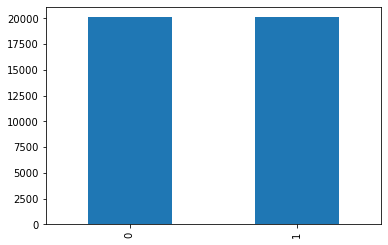

In [29]:
y_under.value_counts().plot(kind = "bar")
print(y_under.value_counts()[1])# creating a bar chart to view the data
plt.show()

In order to check feature importance we can use Random forest classifier and eli5 which is a python package used to get more idea about how a classifier or predictior has worked

# Splitting Data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=42)

In [31]:
X_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
280,8.0524,-7.9631,13.9202,9.8646,11.4271,-13.2656,5.8176,16.3676,-2.3191,8.9582,...,-0.5858,9.2172,1.7678,4.2801,12.3197,0.8251,9.0678,8.7768,10.9228,12.1209
31204,18.0146,-1.1725,8.6087,9.5053,10.2132,-16.6269,3.9507,18.0059,-0.7748,6.2474,...,3.5360,3.7231,2.1258,-0.5019,20.8090,0.4871,-6.1677,6.9445,9.2170,12.3858
38221,8.9720,0.3903,16.9752,5.7244,11.8059,-10.7927,4.5772,16.7334,1.7540,6.9121,...,-1.0402,11.6758,1.5963,3.3562,13.6890,-0.5392,3.3213,8.6637,16.6363,-8.9053
38942,12.0708,-6.0413,12.3131,7.5284,14.1100,-0.2843,5.5642,18.8531,-4.2373,8.7117,...,-1.6545,8.0627,2.6815,2.9577,19.1547,2.6538,-7.5773,8.0585,15.6332,-7.0306
39760,10.4633,-6.0537,12.4037,6.8912,10.0445,-14.3166,5.0104,15.3514,0.8525,7.2200,...,9.4837,14.0110,1.7368,-3.7322,15.9385,1.3178,7.8334,8.8443,16.2694,-3.7486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10.7800,6.4857,13.9083,6.2376,11.5595,-0.9099,4.9800,19.1663,-1.2824,8.6121,...,8.4709,7.1196,1.9943,8.2928,20.4669,0.9554,2.1708,9.5688,13.2177,-1.4309
11284,11.0717,0.0491,14.4100,7.7341,13.4152,-11.3144,5.8814,13.7306,-2.1228,8.6885,...,-2.5317,3.8945,0.4959,-0.5077,20.2824,0.6859,-2.2106,10.2081,17.9446,2.3773
38158,13.8925,2.0532,6.6740,7.6401,12.3289,1.1197,3.9168,14.6423,-1.2510,5.6827,...,0.9000,2.8773,1.4048,2.1916,13.5411,1.6022,3.2551,7.9083,14.6032,14.5857
860,10.1445,-5.7472,6.4648,8.5159,11.4008,-9.4174,4.6150,19.3236,2.0980,6.9170,...,0.0104,5.1997,-0.1380,4.2641,21.8748,1.3314,-4.3103,9.3359,19.9273,3.8754


# Feature Importance

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_under,y_under)

ExtraTreesRegressor()

In [33]:
feature_importances = pd.DataFrame(ETR.feature_importances_,
                                   index = X_under.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
var_81,0.022336
var_139,0.018433
var_12,0.015335
var_26,0.013258
var_110,0.012549
...,...
var_183,0.003643
var_160,0.003631
var_14,0.003603
var_3,0.003581


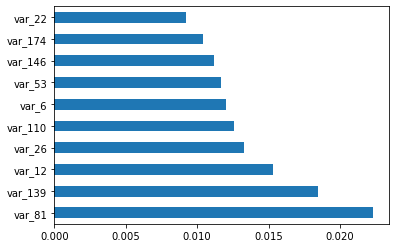

In [34]:
feature_importances = pd.Series(ETR.feature_importances_,
                                   index = X_under.columns)
feature_importances.nlargest(10).plot(kind="barh")
plt.show()


Feature importance shows which variables affect our prediction. From above we can that var_81 has the highest effect on our target

C:\Users\sunsu\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


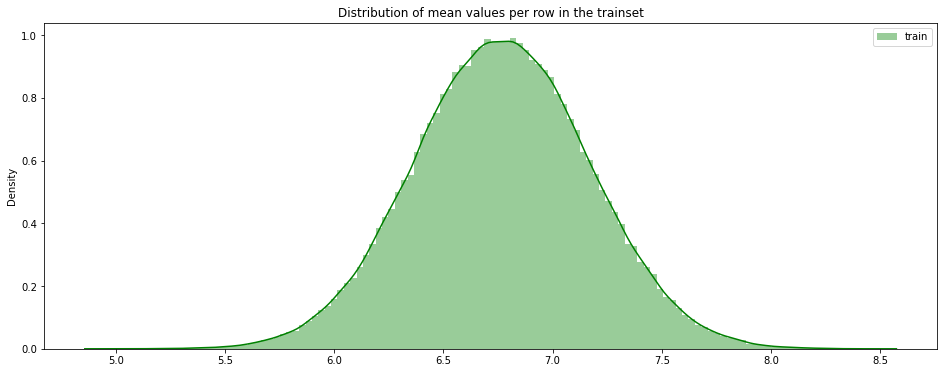

In [35]:
plt.figure(figsize=(16,6))
features = X_train.columns
plt.title("Distribution of mean values per row in the trainset")
sns.distplot(train[features].mean( axis=1),color="green", kde=True,bins=120, label='train')
plt.legend()
plt.show()

C:\Users\sunsu\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


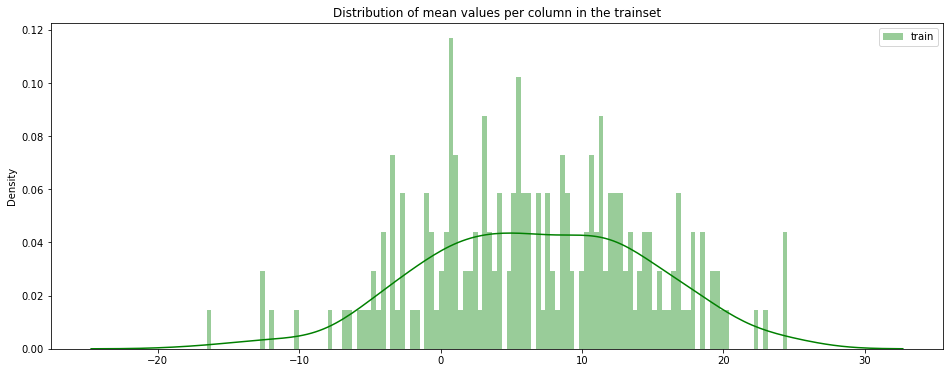

In [36]:
plt.figure(figsize=(16,6))
features = X_train.columns
plt.title("Distribution of mean values per column in the trainset")
sns.distplot(train[features].mean(axis=0),color="green", kde=True,bins=120, label='train')
plt.legend()
plt.show()

Lets round the values to only 2 decimals first

# Normalization

In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_scaled)
X_train

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.399863,0.263318,0.713825,0.769352,0.584472,0.369726,0.581727,0.517403,0.400140,0.738121,...,0.387484,0.616824,0.463781,0.520403,0.142664,0.641688,0.740438,0.436749,0.207199,0.777340
1,0.924038,0.557706,0.392598,0.741284,0.462393,0.298368,0.265277,0.594338,0.482313,0.318830,...,0.520175,0.323672,0.496430,0.347277,0.628667,0.604573,0.251836,0.116596,0.112428,0.781380
2,0.448249,0.625457,0.898585,0.445922,0.622568,0.422223,0.371472,0.534582,0.616871,0.421642,...,0.372856,0.748008,0.448141,0.486954,0.221055,0.491874,0.556148,0.416987,0.524632,0.456694
3,0.611297,0.346632,0.616631,0.586849,0.854287,0.645307,0.538774,0.634123,0.298073,0.699994,...,0.353080,0.555222,0.547108,0.472527,0.533960,0.842499,0.206630,0.311242,0.468901,0.485283
4,0.526716,0.346095,0.622111,0.537072,0.445427,0.347414,0.444902,0.469682,0.568902,0.469266,...,0.711646,0.872609,0.460954,0.230328,0.349836,0.695792,0.700851,0.448543,0.504247,0.535333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26926,0.543380,0.889707,0.713106,0.486013,0.597787,0.632026,0.439749,0.648831,0.455303,0.684588,...,0.679041,0.504901,0.484437,0.665677,0.609082,0.655997,0.519252,0.575133,0.334700,0.570678
26927,0.558728,0.610666,0.743447,0.602919,0.784412,0.411148,0.592542,0.393569,0.410586,0.696405,...,0.324841,0.332818,0.347788,0.347067,0.598520,0.626403,0.378740,0.686836,0.597319,0.628752
26928,0.707148,0.697548,0.275591,0.595575,0.675165,0.675112,0.259530,0.436383,0.456974,0.231485,...,0.435316,0.278542,0.430677,0.444791,0.212588,0.727022,0.554025,0.284998,0.411676,0.814928
26929,0.509942,0.359382,0.262939,0.663992,0.581827,0.451419,0.377879,0.656218,0.635175,0.422400,...,0.406677,0.402460,0.289978,0.519823,0.689683,0.697285,0.311403,0.534439,0.707474,0.651598


In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Xt_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(Xt_scaled)
X_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.379962,0.413623,0.663937,0.329542,0.429641,0.139972,0.380924,0.526890,0.643214,0.593882,...,0.565395,0.680823,0.358669,0.514108,0.574881,0.399202,0.697359,0.276526,0.626637,0.534640
1,0.343493,0.557455,0.594069,0.406333,0.236169,0.672449,0.701880,0.230104,0.592078,0.398305,...,0.551442,0.674157,0.298620,0.583788,0.285962,0.708039,0.300351,0.322357,0.233177,0.316847
2,0.233040,0.483279,0.411711,0.654524,0.516799,0.688048,0.385307,0.318575,0.702752,0.482473,...,0.385653,0.766167,0.477861,0.691910,0.507650,0.510169,0.538285,0.289017,0.250886,0.280986
3,0.328528,0.571894,0.367029,0.731535,0.697411,0.785300,0.632346,0.757990,0.607966,0.526563,...,0.616732,0.603940,0.725076,0.509435,0.821341,0.500722,0.428155,0.495052,0.573246,0.529966
4,0.845376,0.678028,0.476907,0.716914,0.684096,0.802954,0.518062,0.104618,0.659075,0.510136,...,0.379672,0.340129,0.678512,0.409442,0.689408,0.613496,0.433793,0.249253,0.468023,0.555324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13260,0.649609,0.685351,0.619488,0.516746,0.713418,0.147433,0.429605,0.484869,0.537368,0.863038,...,0.755836,0.949568,0.521104,0.643617,0.609700,0.747335,0.287730,0.430162,0.702414,0.302939
13261,0.791580,0.550171,0.711768,0.658179,0.529226,0.690412,0.631859,0.688452,0.451013,0.418698,...,0.539175,0.458092,0.511474,0.704764,0.364214,0.618137,0.719024,0.676873,0.244560,0.603606
13262,0.755804,0.892889,0.369335,0.562819,0.793627,0.315664,0.484686,0.496031,0.706001,0.688277,...,0.614993,0.473419,0.549936,0.575562,0.299377,0.742518,0.378148,0.538664,0.586007,0.791145
13263,0.367103,0.558115,0.611362,0.533414,0.736557,0.632418,0.648260,0.444087,0.452892,0.273365,...,0.539571,0.712141,0.589167,0.569082,0.654918,0.411018,0.593072,0.715152,0.234821,0.613263


In [40]:
X_train = X_train.round(2)
X_test = X_test.round(2)
X_train

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.40,0.26,0.71,0.77,0.58,0.37,0.58,0.52,0.40,0.74,...,0.39,0.62,0.46,0.52,0.14,0.64,0.74,0.44,0.21,0.78
1,0.92,0.56,0.39,0.74,0.46,0.30,0.27,0.59,0.48,0.32,...,0.52,0.32,0.50,0.35,0.63,0.60,0.25,0.12,0.11,0.78
2,0.45,0.63,0.90,0.45,0.62,0.42,0.37,0.53,0.62,0.42,...,0.37,0.75,0.45,0.49,0.22,0.49,0.56,0.42,0.52,0.46
3,0.61,0.35,0.62,0.59,0.85,0.65,0.54,0.63,0.30,0.70,...,0.35,0.56,0.55,0.47,0.53,0.84,0.21,0.31,0.47,0.49
4,0.53,0.35,0.62,0.54,0.45,0.35,0.44,0.47,0.57,0.47,...,0.71,0.87,0.46,0.23,0.35,0.70,0.70,0.45,0.50,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26926,0.54,0.89,0.71,0.49,0.60,0.63,0.44,0.65,0.46,0.68,...,0.68,0.50,0.48,0.67,0.61,0.66,0.52,0.58,0.33,0.57
26927,0.56,0.61,0.74,0.60,0.78,0.41,0.59,0.39,0.41,0.70,...,0.32,0.33,0.35,0.35,0.60,0.63,0.38,0.69,0.60,0.63
26928,0.71,0.70,0.28,0.60,0.68,0.68,0.26,0.44,0.46,0.23,...,0.44,0.28,0.43,0.44,0.21,0.73,0.55,0.28,0.41,0.81
26929,0.51,0.36,0.26,0.66,0.58,0.45,0.38,0.66,0.64,0.42,...,0.41,0.40,0.29,0.52,0.69,0.70,0.31,0.53,0.71,0.65


# Support Vector Classifier

In [74]:
model = SVC(kernel = "linear")
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

In [75]:
classification_scores=classification_report(y_test,y_test_pred)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      6639
           1       0.80      0.74      0.77      6626

    accuracy                           0.78     13265
   macro avg       0.78      0.78      0.78     13265
weighted avg       0.78      0.78      0.78     13265



In [84]:
fpr_s ,tpr_s ,threshold_s = roc_curve(y_test,y_test_pred)

## Random Forest Classifier

In [93]:
forest = RandomForestClassifier(random_state = 42)
y_probas = cross_val_predict(forest,X_train,y_train,cv = 3)

In [94]:
classification_scores=classification_report(y_train,y_probas)
print(classification_scores)
fpr_f ,tpr_f ,threshold = roc_curve(y_train,y_scores_f)

              precision    recall  f1-score   support

           0       0.74      0.73      0.74     13459
           1       0.74      0.75      0.74     13472

    accuracy                           0.74     26931
   macro avg       0.74      0.74      0.74     26931
weighted avg       0.74      0.74      0.74     26931



## ROC Curve

In [100]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr,tpr,linewidth =2, label = label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


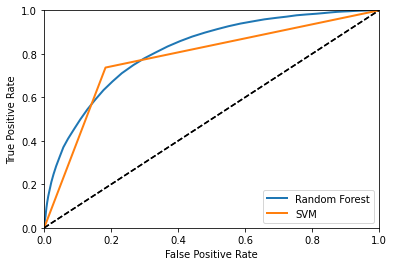

In [101]:
plot_roc_curve(fpr_f,tpr_f,"Random Forest")
plot_roc_curve(fpr_s,tpr_s,"SVM")
plt.legend(loc = "lower right")
plt.show()

In [102]:

print("Random Forest ROC Score {}".format(roc_auc_score(y_train,y_scores_f)))
print("SVM ROC Score {}".format(roc_auc_score(y_test,y_test_pred)))

Random Forest ROC Score 0.8171375172755685
SVM ROC Score 0.7768926261310124
